In [92]:
import mne

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sbj='007'

In [4]:
rec='03'

In [5]:
edf_loc= '/home/Raz/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'

In [103]:
Data = mne.io.read_raw_edf(edf_loc, preload=True)

Extracting EDF parameters from /home/Raz/Motor Imagery Dataset/S007/S007R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [104]:
Data

<RawEDF | S007R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [8]:
raw_data=Data.get_data()

In [9]:
#raw_data

array([[-1.5e-05,  3.0e-06,  1.5e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-2.0e-05,  0.0e+00,  2.5e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-3.5e-05, -4.0e-06,  2.0e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [-3.9e-05,  1.4e-05, -2.9e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-1.6e-05,  3.5e-05, -2.2e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-3.5e-05,  4.0e-06, -2.6e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00]])

## Getting Data

In [10]:
np.shape(raw_data)

(64, 20000)

In [11]:
channels=Data.ch_names


In [45]:
info=Data.info
info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [13]:
Data.annotations

<Annotations | 30 segments: T0 (15), T1 (7), T2 (8)>

In [14]:
ica=mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)

In [15]:
ica.fit(Data)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 64 components
Fitting ICA took 29.8s.


<ICA  |  raw data decomposition, fit (fastica): 20000 samples, 64 components, channels used: "eeg">

In [73]:
type(ica)

mne.preprocessing.ica.ICA

In [74]:
ica.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

## Montages and layout

In [95]:
montage=mne.channels.make_standard_montage(kind='standard_1020')

In [96]:
montage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


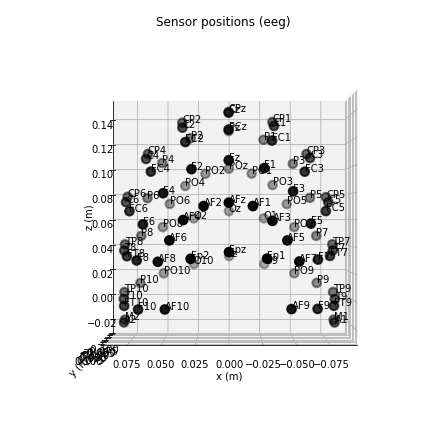

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


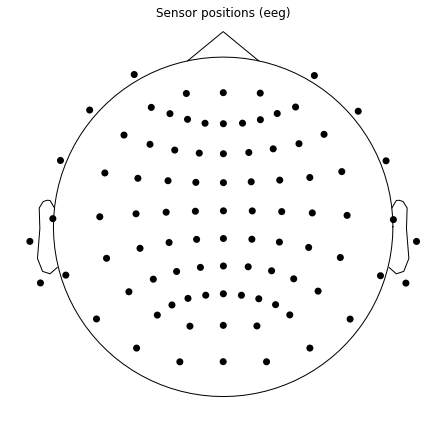

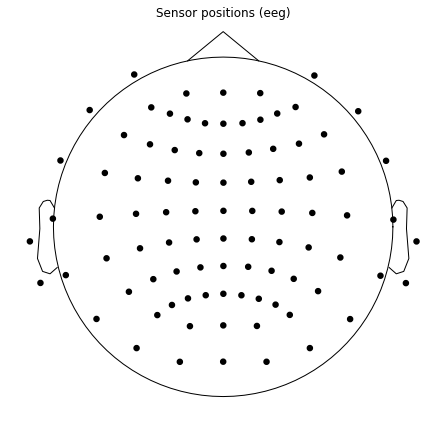

In [97]:
fig=montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
montage.plot(kind='topomap', show_names=False)

In [106]:
#Data.set_montage(montage)

ValueError: DigMontage is a only a subset of info. There are 64 channel positions not present in the DigMontage. The required channels are: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']

## Reading sensor ditization files

fig =plt.figure()
ax2d=fig.add_subplot(121)
ax3d=fig.add_subplot(122, projection='3d')
Data.plot_sensors(ch_type='eeg', axes=ax2d)
Data.plot_sensors(ch_type='eeg', axes=ax3d, kind='3d')
ax3d.view_init(azim=70, elev=20)

xx=mne.channels.Montage(montage, ch_names)

ica.plot_properties(Data, picks=None)

In [17]:
orig_Data=Data.copy()

In [18]:
Data.load_data()

Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<RawEDF | S007R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [19]:
ica.apply(Data)

Transforming to ICA space (64 components)
Zeroing out 0 ICA components


<RawEDF | S007R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [46]:
ch_names=Data.ch_names
ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [49]:
chs=['Fpz.','Fp1.','Fp2.','Af3.','Af7.','Af8.']

In [50]:
chan_indxs=[Data.ch_names.index(ch) for ch in chs]

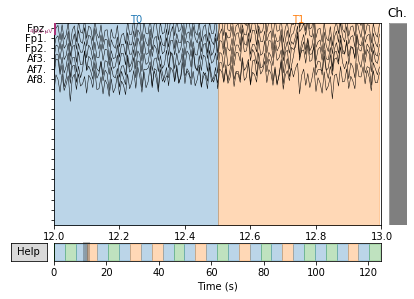

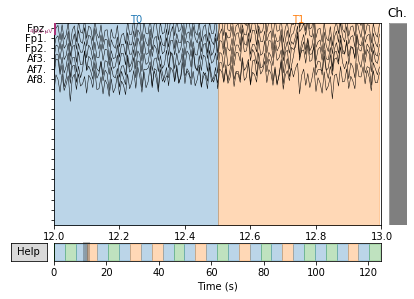

In [54]:
orig_Data.plot(order=chan_indxs, start=12, duration=1)

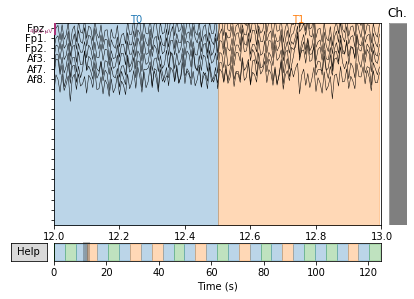

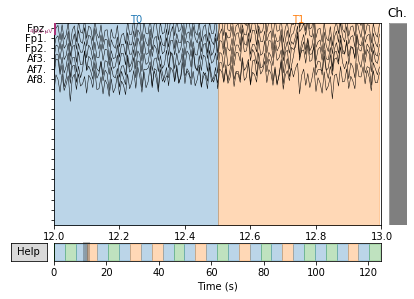

In [52]:
Data.plot(order=chan_indxs, start=12, duration=1)

In [22]:
event_id={'T0': 0, 'T1': 1, 'T2': 2}

In [23]:
event_id

{'T0': 0, 'T1': 1, 'T2': 2}

In [24]:
events=mne.events_from_annotations(Data,event_id)[0]

Used Annotations descriptions: ['T0', 'T1', 'T2']


In [25]:
events

array([[    0,     0,     0],
       [  672,     0,     2],
       [ 1328,     0,     0],
       [ 2000,     0,     1],
       [ 2656,     0,     0],
       [ 3328,     0,     2],
       [ 3984,     0,     0],
       [ 4656,     0,     1],
       [ 5312,     0,     0],
       [ 5984,     0,     1],
       [ 6640,     0,     0],
       [ 7312,     0,     2],
       [ 7968,     0,     0],
       [ 8640,     0,     1],
       [ 9296,     0,     0],
       [ 9968,     0,     2],
       [10624,     0,     0],
       [11296,     0,     1],
       [11952,     0,     0],
       [12624,     0,     2],
       [13280,     0,     0],
       [13952,     0,     1],
       [14608,     0,     0],
       [15280,     0,     2],
       [15936,     0,     0],
       [16608,     0,     2],
       [17264,     0,     0],
       [17936,     0,     1],
       [18592,     0,     0],
       [19264,     0,     2]])

In [26]:
type(events)

numpy.ndarray

In [27]:
#events[1][0]

In [28]:
epochs=mne.Epochs(Data, events,event_id=event_id)

30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [29]:
epochs

<Epochs  |   30 events (good & bad), -0.2 - 0.5 sec, baseline [None, 0], ~130 kB, data not loaded,
 'T0': 15
 'T1': 7
 'T2': 8>

In [30]:
type(epochs)

mne.epochs.Epochs

In [31]:
epochs['T0']

<Epochs  |   15 events (good & bad), -0.2 - 0.5 sec, baseline [None, 0], ~130 kB, data not loaded,
 'T0': 15>

Loading data for 15 events and 113 original time points ...
1 bad epochs dropped
14 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


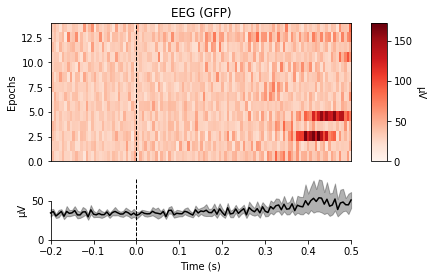

[<Figure size 432x288 with 3 Axes>]

In [32]:
epochs['T0'].plot_image()

Loading data for 7 events and 113 original time points ...
0 bad epochs dropped
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


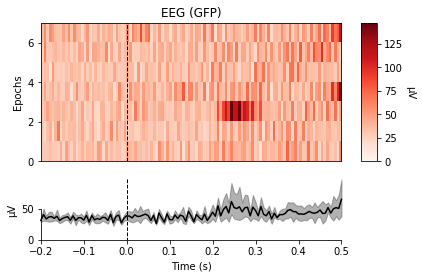

[<Figure size 432x288 with 3 Axes>]

In [33]:
epochs['T1'].plot_image()

Loading data for 8 events and 113 original time points ...
0 bad epochs dropped
8 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


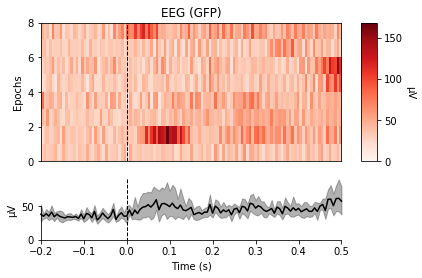

[<Figure size 432x288 with 3 Axes>]

In [34]:
epochs['T2'].plot_image()

## Detecting experimental events

In [113]:
T0=mne.find_events(Data, stim_channel='T0')

TypeError: find_events() got an unexpected keyword argument 'event_id'

## visualizing events


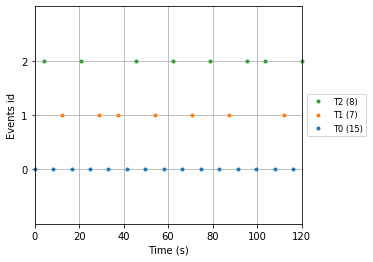

In [109]:
fig = mne.viz.plot_events(events,event_id=event_id,sfreq=Data.info['sfreq'], first_samp=Data.first_samp)